# 지하철 유무임 승차 분석

## 1. csv 파일 읽고 데이터 정제

In [31]:
import pandas as pd
import numpy as np
subway_raw = pd.read_csv('./data/subwayfree_202403.csv', encoding='utf-8')
subway_raw.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2024-03,1호선,150,서울역,1447754,1393734,227062,217639
1,2024-03,1호선,151,시청,664265,656796,111445,108138
2,2024-03,1호선,152,종각,964737,946524,152686,142688
3,2024-03,1호선,153,종로3가,499200,462956,310535,287412
4,2024-03,1호선,154,종로5가,507635,495448,270416,260685


In [21]:
subway_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     622 non-null    object
 1   호선명     622 non-null    object
 2   역ID     622 non-null    int64 
 3   지하철역    622 non-null    object
 4   유임승차    622 non-null    int64 
 5   유임하차    622 non-null    int64 
 6   무임승차    622 non-null    int64 
 7   무임하차    622 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 39.0+ KB


### (1) 유무임 승차 비율이 가장 높은 역
#### 첫번째 방법: 유임승차/무임승차

In [34]:
rate = subway_raw['유임승차'] / subway_raw['무임승차']

In [35]:
subway_raw['유무임승차비율1'] = rate

In [36]:
subway_raw

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1
0,2024-03,1호선,150,서울역,1447754,1393734,227062,217639,6.376029
1,2024-03,1호선,151,시청,664265,656796,111445,108138,5.960474
2,2024-03,1호선,152,종각,964737,946524,152686,142688,6.318438
3,2024-03,1호선,153,종로3가,499200,462956,310535,287412,1.607548
4,2024-03,1호선,154,종로5가,507635,495448,270416,260685,1.877237
...,...,...,...,...,...,...,...,...,...
617,2024-03,신림선,4407,당곡,102268,97581,40291,39955,2.538234
618,2024-03,신림선,4408,신림,38477,54633,17153,21540,2.243164
619,2024-03,신림선,4409,서원,81027,68501,26212,26004,3.091218
620,2024-03,신림선,4410,서울대벤처타운,229893,203104,71540,70626,3.213489


In [37]:
subway_sort = subway_raw.copy().replace([np.inf],0).sort_values('유무임승차비율1', ascending=False)

In [38]:
subway_sort

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1
72,2024-03,3호선,321,충무로,261,0,1,0,261.000000
240,2024-03,분당선,1031,복정,168,0,2,0,84.000000
269,2024-03,일산선,1949,지축,61,0,1,0,61.000000
192,2024-03,경원선,1022,창동,92,0,3,0,30.666667
449,2024-03,6호선,2615,연신내,119,0,4,0,29.750000
...,...,...,...,...,...,...,...,...,...
526,2024-03,7호선,2753,까치울,2,0,0,0,0.000000
336,2024-03,경의선,1297,검암,3,0,0,0,0.000000
334,2024-03,경의선,1295,김포공항,1,0,0,0,0.000000
483,2024-03,6호선,2649,신내,16,0,0,0,0.000000


In [39]:
print('유임승차비율이 높은 역: %s, 비율:%f' % (subway_sort.iloc[0]['지하철역'], subway_sort.iloc[0]['유무임승차비율1']))

유임승차비율이 높은 역: 충무로, 비율:261.000000


### (2) 유무임 승차 비율이 가장 높은 역
#### 두번째 방법: 유임승차/(유임승차+무임승차)

In [41]:
subway_raw['유임승차비율2'] = subway_raw['유임승차'] / (subway_raw['유임승차'] + subway_raw['무임승차'])
subway_raw

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
0,2024-03,1호선,150,서울역,1447754,1393734,227062,217639,6.376029,0.864426
1,2024-03,1호선,151,시청,664265,656796,111445,108138,5.960474,0.856332
2,2024-03,1호선,152,종각,964737,946524,152686,142688,6.318438,0.863359
3,2024-03,1호선,153,종로3가,499200,462956,310535,287412,1.607548,0.616498
4,2024-03,1호선,154,종로5가,507635,495448,270416,260685,1.877237,0.652444
...,...,...,...,...,...,...,...,...,...,...
617,2024-03,신림선,4407,당곡,102268,97581,40291,39955,2.538234,0.717373
618,2024-03,신림선,4408,신림,38477,54633,17153,21540,2.243164,0.691659
619,2024-03,신림선,4409,서원,81027,68501,26212,26004,3.091218,0.755574
620,2024-03,신림선,4410,서울대벤처타운,229893,203104,71540,70626,3.213489,0.762667


In [49]:
subway_sort = subway_raw.sort_values(by='유임승차비율2', ascending=False)
subway_sort = subway_sort[subway_sort['유임승차']+subway_sort['무임승차'] > 100000 ]
subway_sort

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
18,2024-03,2호선,209,한양대,381269,433076,14528,15614,26.243736,0.963294
48,2024-03,2호선,239,홍대입구,2185511,2360413,102715,99837,21.277428,0.955112
573,2024-03,공항철도 1호선,4203,홍대입구,445365,435472,22015,19851,20.230070,0.952897
466,2024-03,6호선,2632,한강진,298690,350711,17887,17641,16.698720,0.943499
120,2024-03,경부선,1001,서울역,302024,101822,18565,4416,16.268462,0.942091
...,...,...,...,...,...,...,...,...,...,...
602,2024-03,우이신설선,4705,화계,62388,56572,49600,50085,1.257823,0.557095
226,2024-03,과천선,1451,경마공원,115364,116449,92942,91931,1.241247,0.553820
195,2024-03,경원선,1903,도봉산,140679,79213,125772,98492,1.118524,0.527973
9,2024-03,1호선,159,동묘앞,169654,179509,183569,185429,0.924197,0.480303


In [50]:
print('유임승차비율이 높은 역: %s, 비율:%f' % (subway_sort.iloc[0]['지하철역'], subway_sort.iloc[0]['유임승차비율2']))

유임승차비율이 높은 역: 한양대, 비율:0.963294


### 유임승치 인원이 많은곳
#### 한양대 2호선
#### 홍대입구 2호선

### 유임승차 비율이 0.94 이상인 역

In [53]:
subway_sort[subway_sort['유임승차비율2'] >= 0.94]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
18,2024-03,2호선,209,한양대,381269,433076,14528,15614,26.243736,0.963294
48,2024-03,2호선,239,홍대입구,2185511,2360413,102715,99837,21.277428,0.955112
573,2024-03,공항철도 1호선,4203,홍대입구,445365,435472,22015,19851,20.230070,0.952897
466,2024-03,6호선,2632,한강진,298690,350711,17887,17641,16.698720,0.943499
120,2024-03,경부선,1001,서울역,302024,101822,18565,4416,16.268462,0.942091


## 2. 유무임 승하차 인원이 많은 역 알아보기

#### (1) 유임승차 인원이 많은 역

In [64]:
subway_raw.sort_values(by='유임승차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
31,2024-03,2호선,222,강남,2209300,2161564,167337,146031,13.202699,0.929591


#### (2) 유임하차 인원이 많은역

In [65]:
subway_raw.sort_values(by='유임하차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
48,2024-03,2호선,239,홍대입구,2185511,2360413,102715,99837,21.277428,0.955112


#### (3) 무임승차 인원이 많은역

In [66]:
subway_raw.sort_values(by='무임승차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
125,2024-03,경부선,1006,영등포,1009662,1039742,315673,317344,3.198443,0.761816


#### (4) 무임하차 인원이 많은역

In [67]:
subway_raw.sort_values(by='무임하차', ascending=False).head(1)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,유무임승차비율1,유임승차비율2
125,2024-03,경부선,1006,영등포,1009662,1039742,315673,317344,3.198443,0.761816


# 3. 모든 역의 유무임 승하차 비율을 시각화

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... Sorry~~~')

### (1) 역이름을 제목으로 표시, 각 비율과 레이블 추가

In [74]:
subway_raw.iloc[0]

사용월          2024-03
호선명              1호선
역ID              150
지하철역             서울역
유임승차         1447754
유임하차         1393734
무임승차          227062
무임하차          217639
유무임승차비율1    6.376029
유임승차비율2     0.864426
Name: 0, dtype: object

In [80]:
print(subway_raw.iloc[0][1] ,subway_raw.iloc[0][3])

1호선서울역


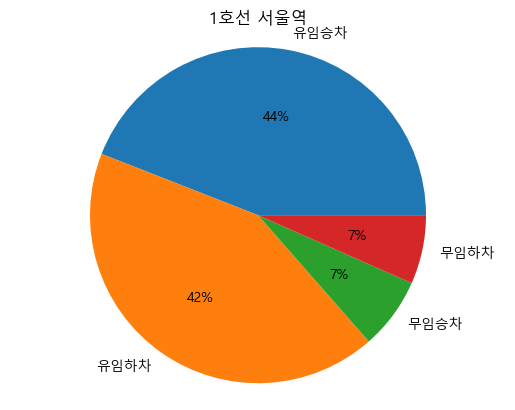

In [85]:
# subway_raw의 첫번째 역

columns = ['유임승차', '유임하차', '무임승차', '무임하차']
plt.title(subway_raw.iloc[0][1] +' '+ subway_raw.iloc[0][3])
plt.pie(subway_raw.iloc[0][columns], labels = columns, autopct = '%1.f%%')
plt.axis('equal') # 축의 범위와 스케일을 동일하게 설정
plt.show()

### 유무임 승하차 비율을 이미지로 저장

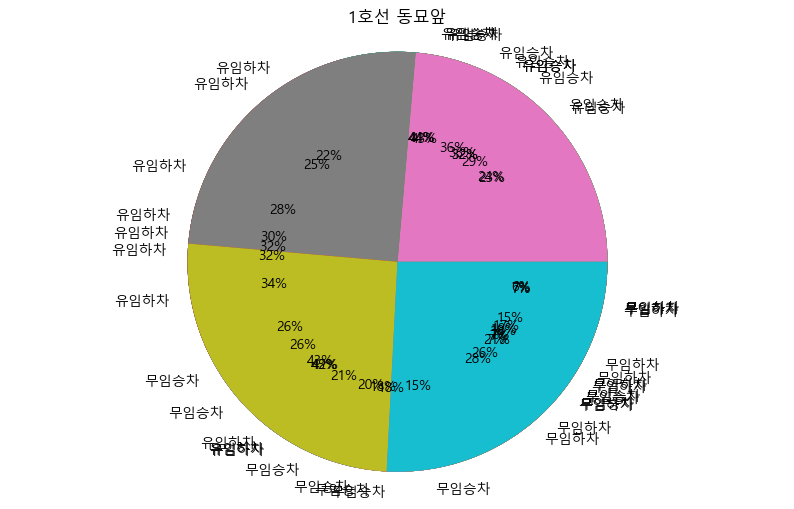

In [90]:
columns = ['유임승차', '유임하차', '무임승차', '무임하차']
image_path = './images/'
plt.figure(figsize =(10,6))
# 전체역에 대한 파이 반복으로 출력
#for n in subway_raw.ide:
for n in range(10): # 10개 역에 대해서만 반복
    plt.title(subway_raw.iloc[n][1] +' '+ subway_raw.iloc[n][3])
    plt.pie(subway_raw.iloc[n][columns], labels = columns, autopct = '%1.f%%')
    plt.axis('equal') # 축의 범위와 스케일을 동일하게 설정
    #plt.savefig(image_path + subway_raw.iloc[n][1] +' '+ subway_raw.iloc[n][3] + '.png')
    #plt.show()
